In [1]:
# Train torchvision with our dataset:
# https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
# https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

from __future__ import print_function
from __future__ import division

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import json

# Torch enable cuda
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("=======================================================================")
print(" PyTorch version:     ", torch.__version__)
print(" Torchvision version: ", torchvision.__version__)
print(" Device:              ", device)
print("=======================================================================")


 PyTorch version:      1.12.1+cu116
 Torchvision version:  0.13.1+cu116
 Device:               cuda:0


In [2]:
ASSETS_DIR = '../assets'
DATASET_DIR = f'{ASSETS_DIR}/coins_dataset'
MODEL_STATE_DIR = f'../model_state'

Load the model

In [5]:
import typing
from money_counter import data, models
from torch.utils.data import Subset

# Load the model
model, model_name = models.get_fasterrcnn_pretrained()

# Load the latest weights
version_manager = models.VersionManager(MODEL_STATE_DIR)


version_manager.load_model(model_name, model, mode="best")


Loading model from ../model_state/fasterrcnn_resnet50_fpn-pretrained/epoch_40.000000.pth
Loaded model from ../model_state/fasterrcnn_resnet50_fpn-pretrained/epoch_40.000000.pth


(40, 0.22741659009648907)

Load the data

In [6]:
data_loader_train, data_loader_test = data.get_data_loaders(DATASET_DIR)


Draw the first 10 images with the boxes

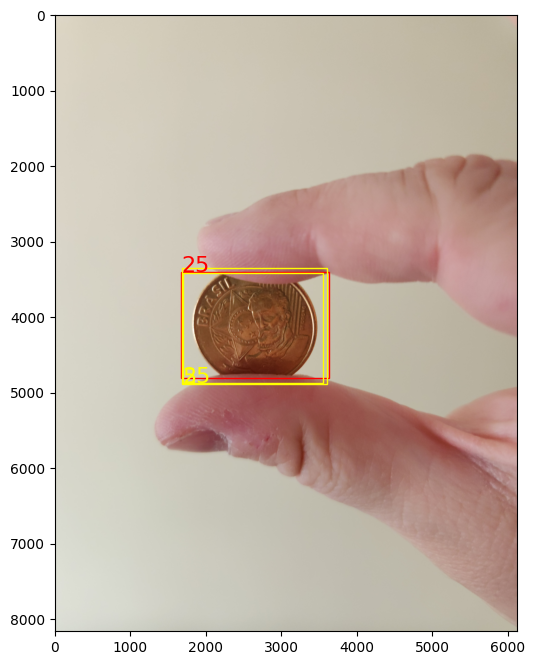

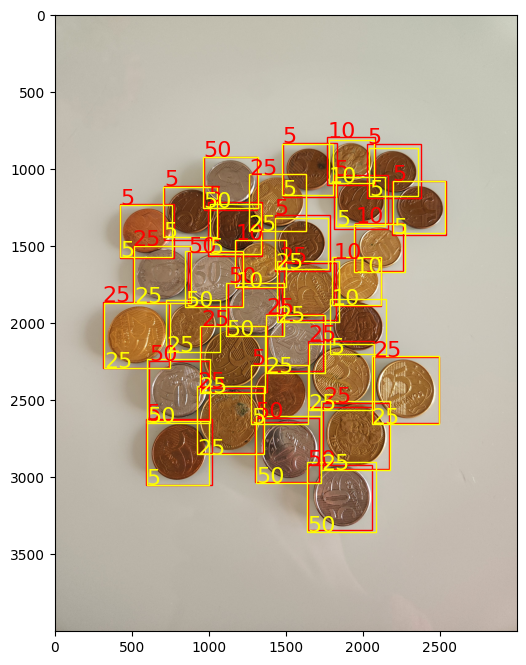

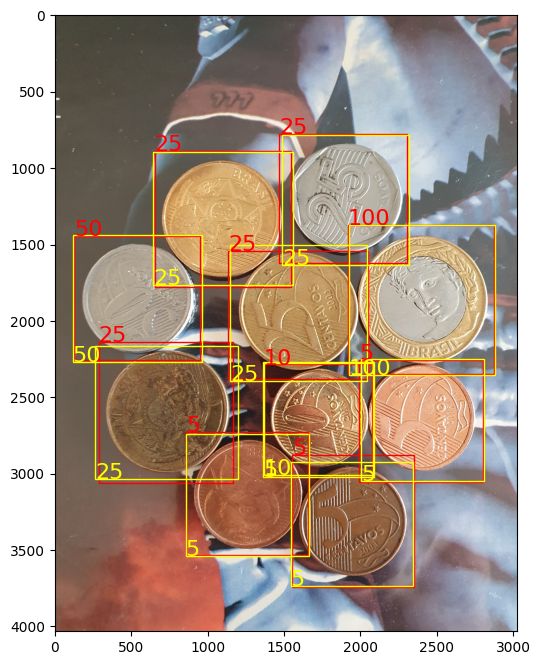

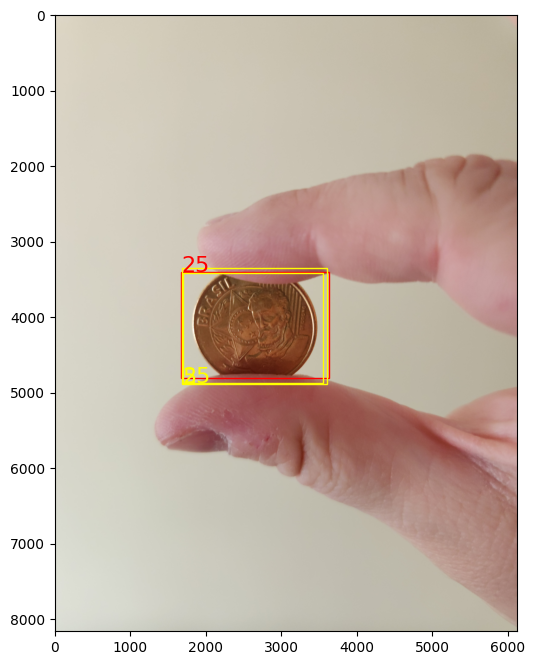

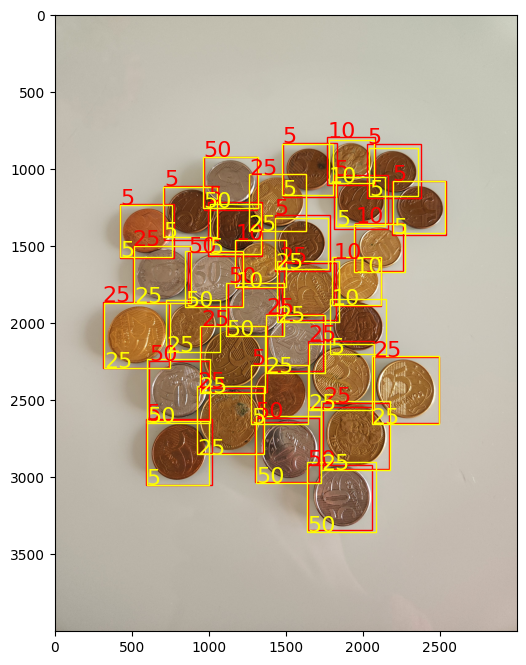

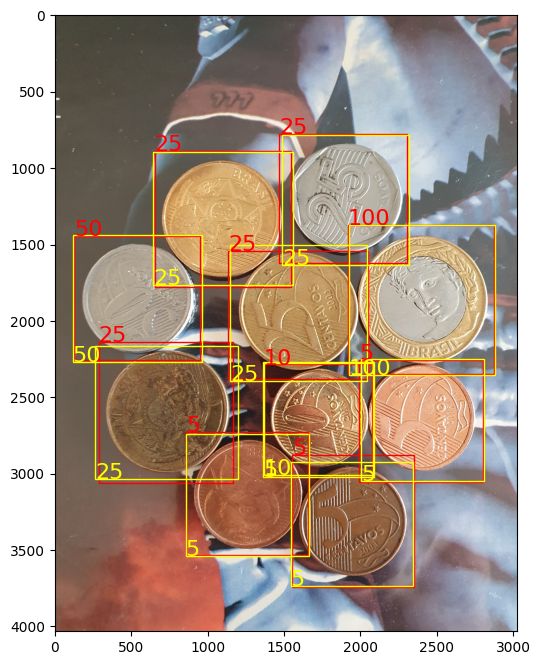

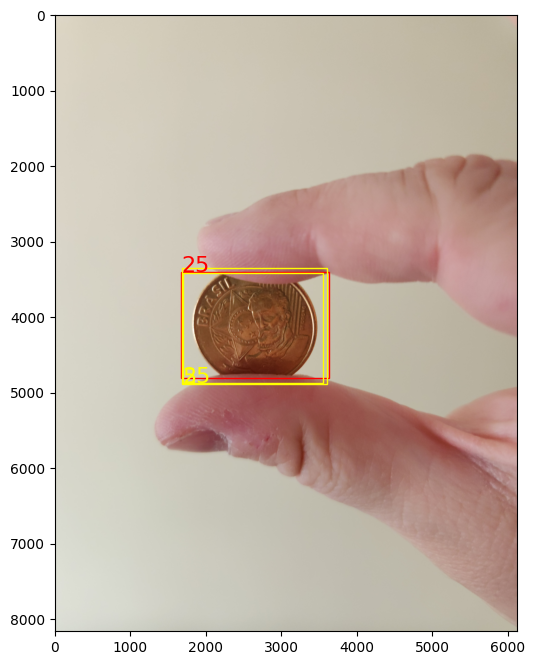

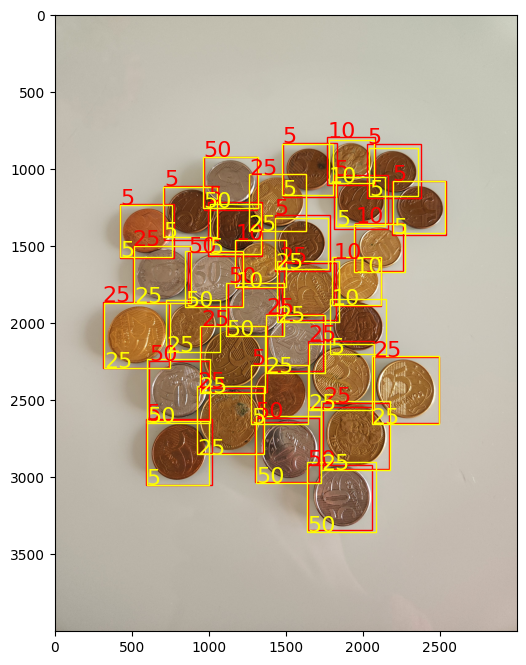

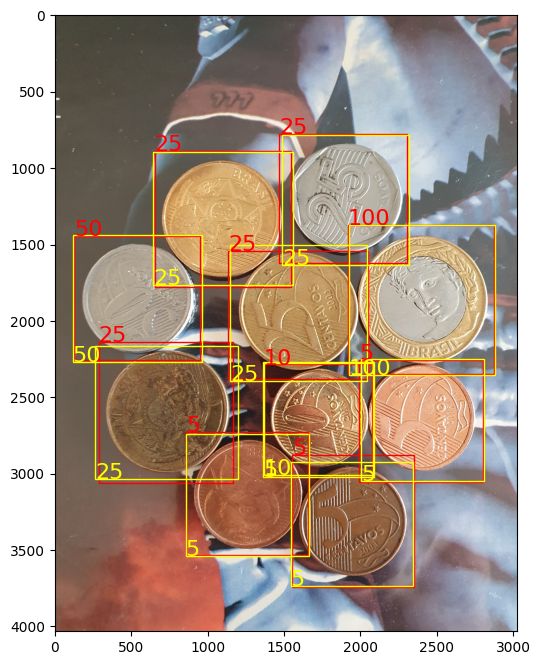

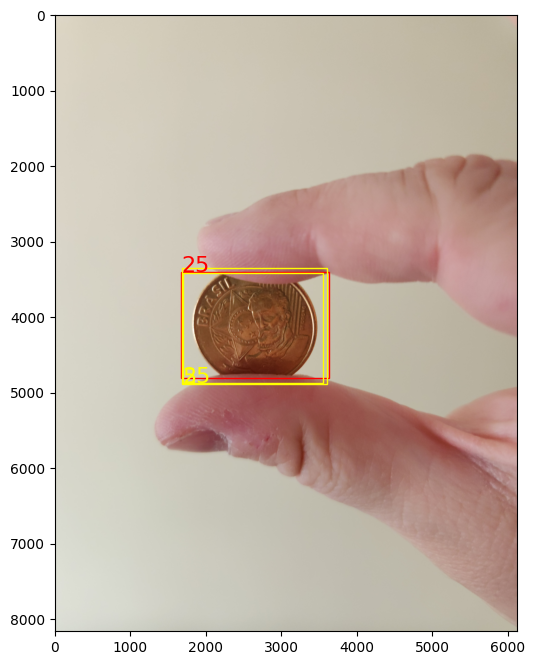

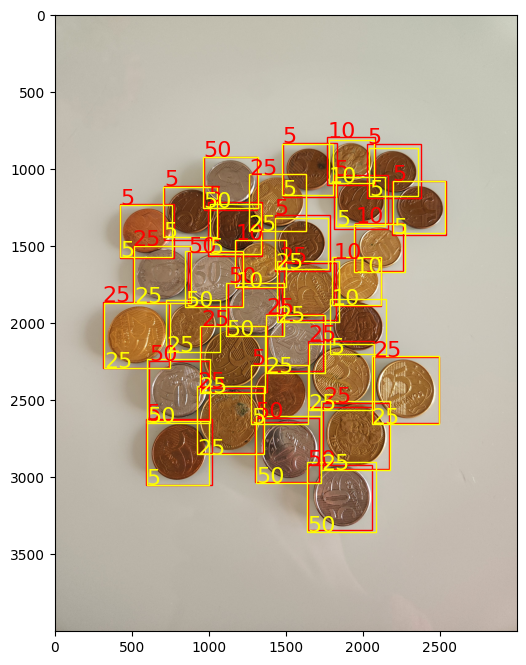

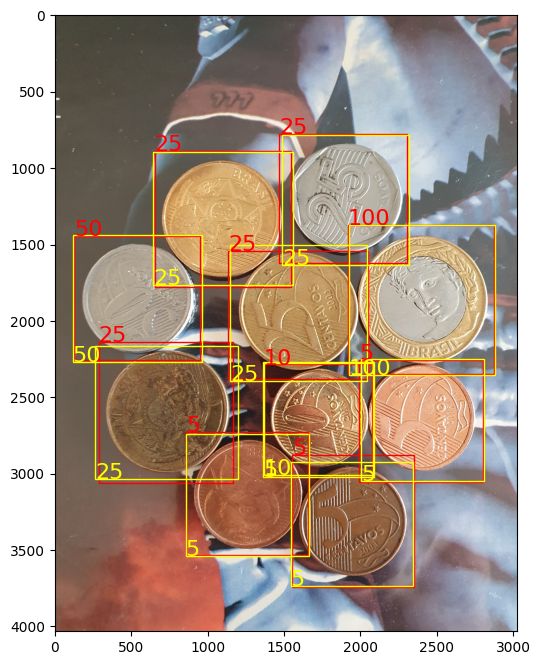

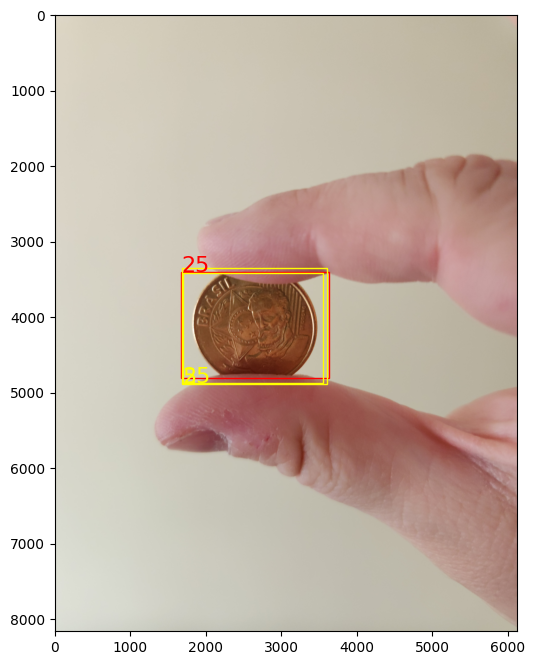

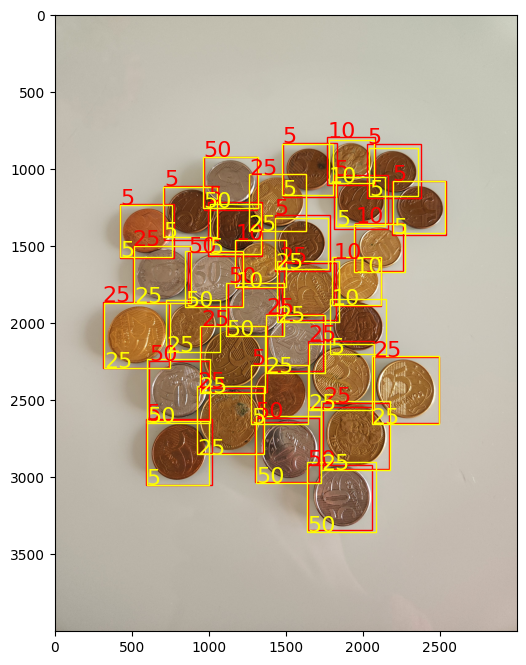

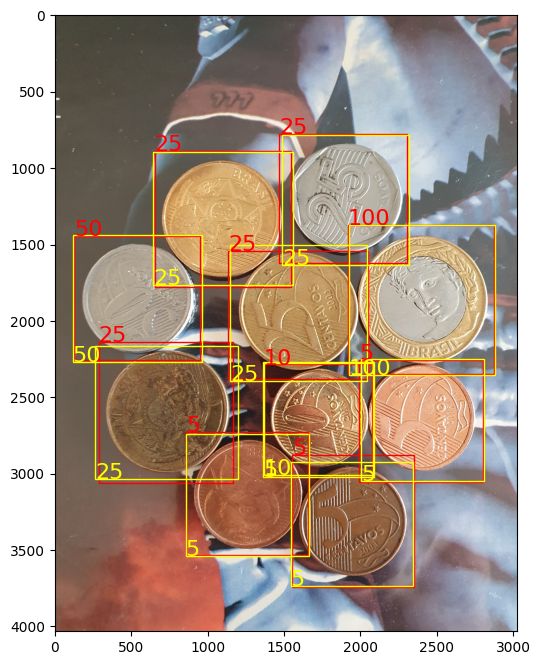

In [11]:
from money_counter.validation_utils import render_image_and_boxes
from money_counter import _constants as const

model = model.to(device)
model.eval()

label_map = {label: i for i, label in enumerate(const.CLASSES)}


with torch.no_grad():
    for _ in range(5):
        # Get some images from disk
        images, targets = next(iter(data_loader_test))
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Compute predictions
        predicted_targets = model(images)

        # Render the image and the predictions
        for image, target, predicted in zip(images, targets, predicted_targets):
            # Move back to CPU
            image = image.cpu()
            target = {k: v.cpu() for k, v in target.items()}
            predicted = {k: v.cpu() for k, v in predicted.items()}
                    
            subset_test = typing.cast(Subset, data_loader_test.dataset)
            data_set_test = typing.cast(data.CoinsDataset, subset_test.dataset)

            inverted_label_map = {v: k for k, v in label_map.items()}

            render_image_and_boxes(image, target, predicted, inverted_label_map, 0.5) # type: ignore
